# Construyendo un Mundo 3D - Visualización de Mallas

Taller de Computación Visual: exploración de vértices, aristas y caras de un modelo 3D usando Python.

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from PIL import Image
import os

os.makedirs('../models', exist_ok=True)
os.makedirs('../media', exist_ok=True)

print('Imports loaded successfully.')

In [10]:
mesh = trimesh.load('../models/cat.stl')

if isinstance(mesh, trimesh.Scene):
    mesh = mesh.dump(concatenate=True)

print('=== Mesh Structural Info ===')
print(f'Vertices:   {len(mesh.vertices)}')
print(f'Edges:      {len(mesh.edges)}')
print(f'Faces:      {len(mesh.faces)}')
print(f'Watertight: {mesh.is_watertight}')
print(f'Surface area: {mesh.area:.4f}')
print(f'Volume:     {mesh.volume:.4f}')

=== Mesh Structural Info ===
Vertices:   1412
Edges:      8496
Faces:      2832
Watertight: False
Surface area: 7510.9233
Volume:     30808.0690


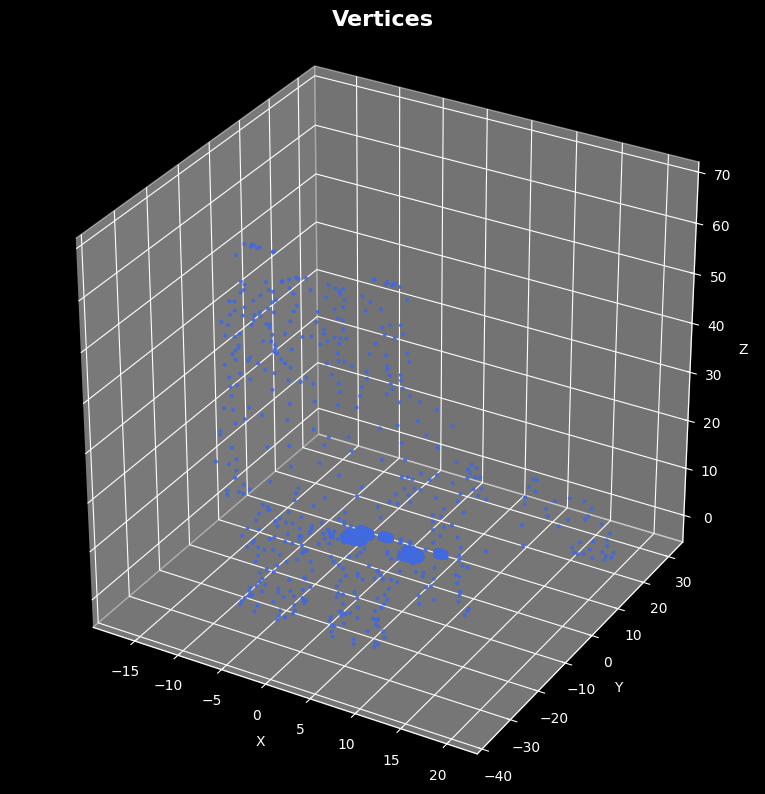

Saved: ../media/python_vertices.png


In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

vertices = mesh.vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
           c='royalblue', s=4, alpha=0.8)

ax.set_title('Vertices', fontsize=16, fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.savefig('../media/python_vertices.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: ../media/python_vertices.png')

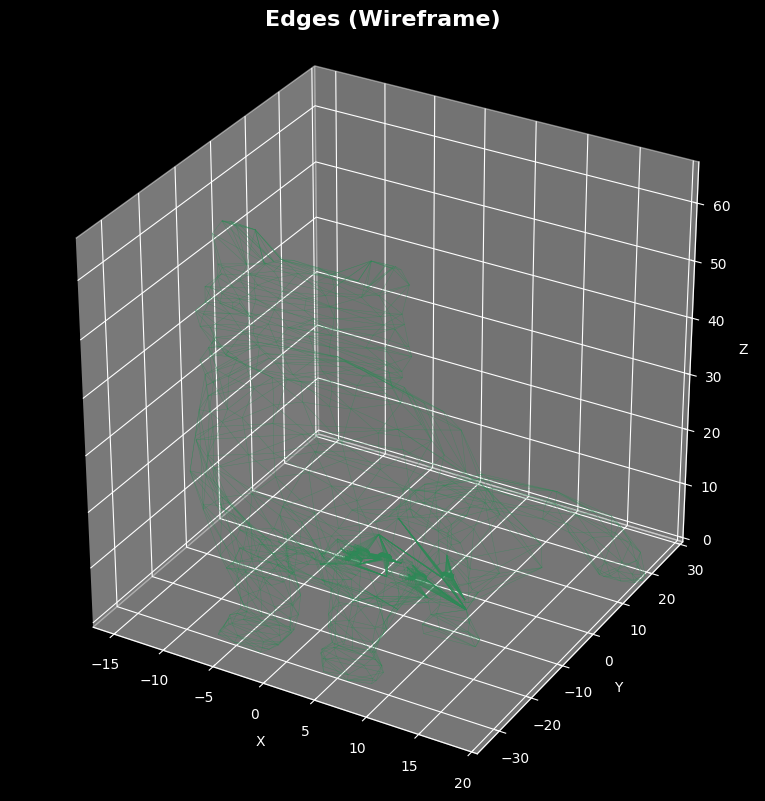

Saved: ../media/python_edges.png


In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

edges = mesh.edges_unique
edge_lines = vertices[edges]

line_collection = Line3DCollection(edge_lines, colors='seagreen', linewidths=0.3, alpha=0.6)
ax.add_collection3d(line_collection)

# Set axis limits from mesh bounds
bounds = mesh.bounds
ax.set_xlim(bounds[0][0], bounds[1][0])
ax.set_ylim(bounds[0][1], bounds[1][1])
ax.set_zlim(bounds[0][2], bounds[1][2])

ax.set_title('Edges (Wireframe)', fontsize=16, fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.savefig('../media/python_edges.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: ../media/python_edges.png')

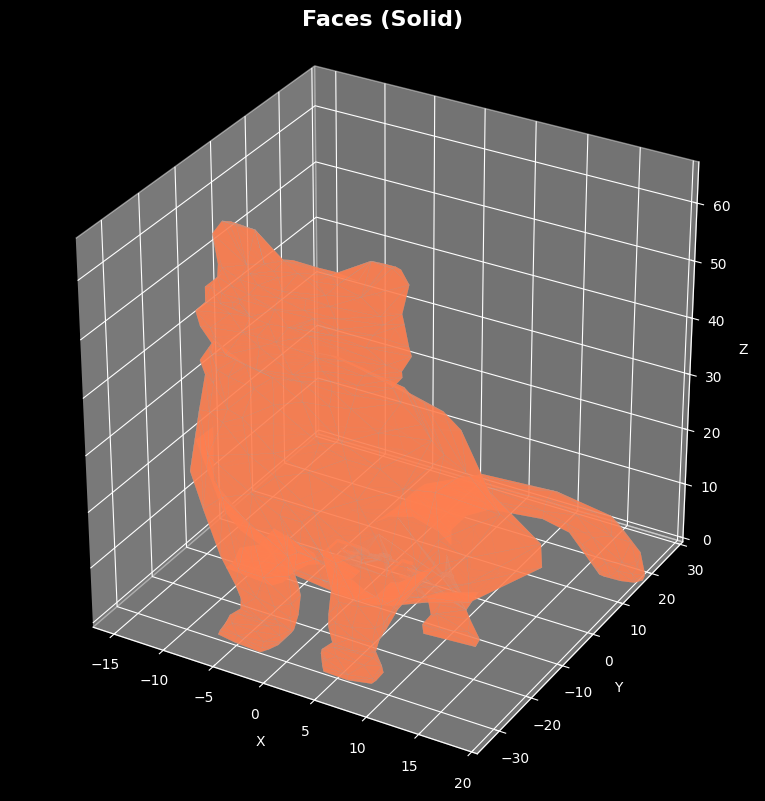

Saved: ../media/python_faces.png


In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

face_vertices = vertices[mesh.faces]

poly_collection = Poly3DCollection(face_vertices, alpha=0.7,
                                    facecolor='coral', edgecolor='darkgray', linewidths=0.1)
ax.add_collection3d(poly_collection)

bounds = mesh.bounds
ax.set_xlim(bounds[0][0], bounds[1][0])
ax.set_ylim(bounds[0][1], bounds[1][1])
ax.set_zlim(bounds[0][2], bounds[1][2])

ax.set_title('Faces (Solid)', fontsize=16, fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.savefig('../media/python_faces.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: ../media/python_faces.png')

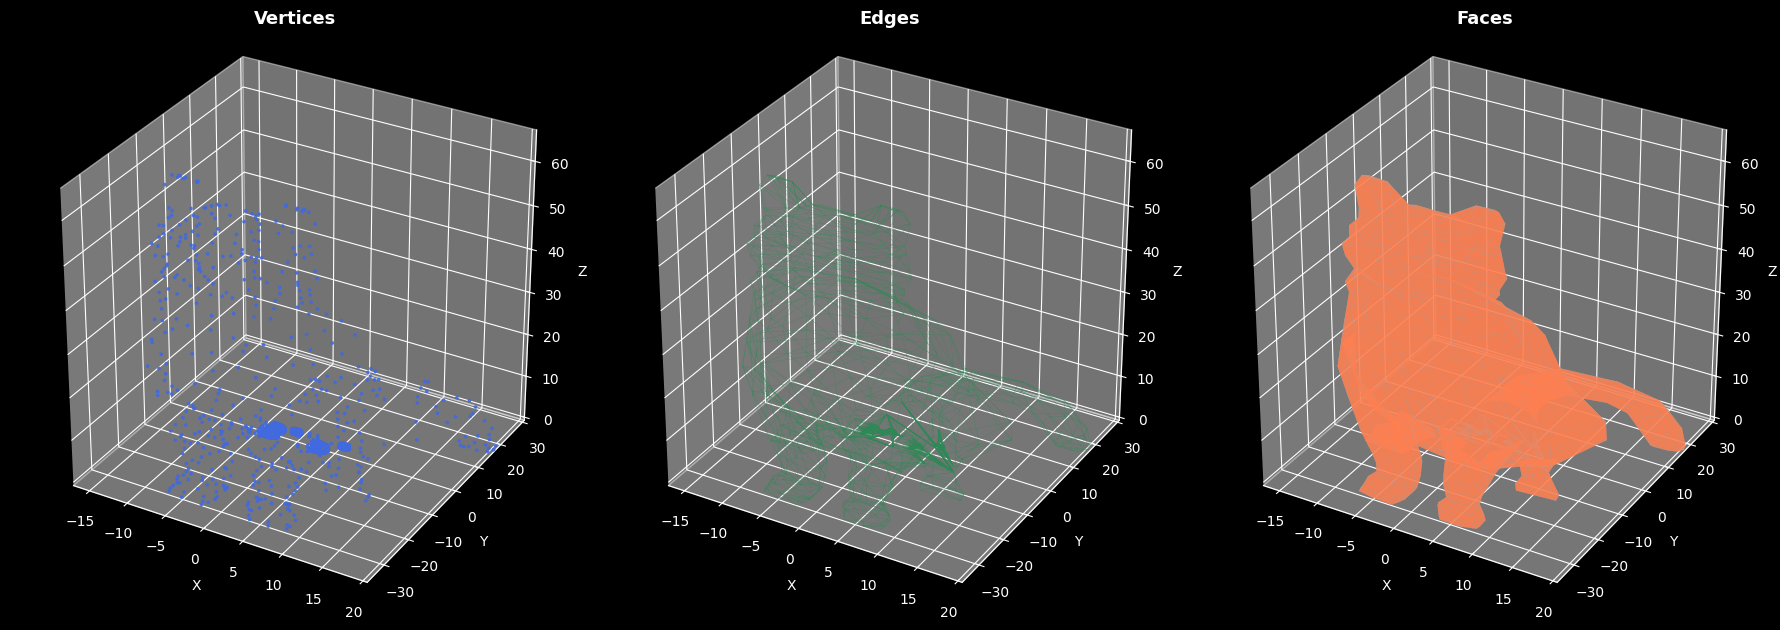

Saved: ../media/python_combined.png
Saved: ../media/python_rotation.gif (36 frames)


In [15]:
def setup_ax(ax, title):
    bounds = mesh.bounds
    ax.set_xlim(bounds[0][0], bounds[1][0])
    ax.set_ylim(bounds[0][1], bounds[1][1])
    ax.set_zlim(bounds[0][2], bounds[1][2])
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Vertices
axes[0].scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                c='royalblue', s=3, alpha=0.8)
setup_ax(axes[0], 'Vertices')

# Edges
edge_lines = vertices[mesh.edges_unique]
lc = Line3DCollection(edge_lines, colors='seagreen', linewidths=0.3, alpha=0.6)
axes[1].add_collection3d(lc)
setup_ax(axes[1], 'Edges')

# Faces
face_verts = vertices[mesh.faces]
pc = Poly3DCollection(face_verts, alpha=0.7, facecolor='coral', edgecolor='darkgray', linewidths=0.1)
axes[2].add_collection3d(pc)
setup_ax(axes[2], 'Faces')

plt.tight_layout()
plt.savefig('../media/python_combined.png', dpi=150, bbox_inches='tight')
plt.show()
print('Saved: ../media/python_combined.png')

# GIF
frames = []
for angle in range(0, 360, 10):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    pc = Poly3DCollection(face_verts, alpha=0.7, facecolor='coral', edgecolor='darkgray', linewidths=0.1)
    ax.add_collection3d(pc)
    setup_ax(ax, 'Rotating Mesh')
    ax.view_init(elev=25, azim=angle)

    fig.canvas.draw()
    w, h = fig.canvas.get_width_height()
    buf = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8).reshape(h, w, 4)
    image = Image.fromarray(buf[:, :, :3])
    frames.append(image)
    plt.close(fig)

frames[0].save('../media/python_rotation.gif', save_all=True,
               append_images=frames[1:], duration=100, loop=0)
print(f'Saved: ../media/python_rotation.gif ({len(frames)} frames)')